In [1]:
#!pip install install dowhy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dowhy import CausalModel
import dowhy.datasets
from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')

/Users/jbanerje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jbanerje/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [4]:
# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])


In [5]:
model.summary()

"Model to find the causal effect of treatment ['v0'] on outcome ['y']"

In [6]:
#model.get_common_causes()
#model.get_effect_modifiers()
model.get_instruments()


In [7]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-1.778943,0.0,0.172331,0.128408,1.215592,-1.059345,2.127671,0,True,16.019478
1,-0.882444,0.0,0.612082,1.663950,0.645346,0.757759,-0.096843,0,True,19.536264
2,-1.563345,1.0,0.151204,-0.331861,0.811239,0.324030,-0.551196,3,True,12.793098
3,1.909368,1.0,0.859783,0.475455,-1.696121,-0.901749,-0.038991,1,True,9.502583
4,-0.447738,0.0,0.644901,0.077677,-0.215410,0.646329,-2.535273,2,True,3.654139
...,...,...,...,...,...,...,...,...,...,...
4995,-2.216611,1.0,0.071018,0.243834,1.564069,0.100287,0.350042,2,True,16.790021
4996,-0.494158,0.0,0.368075,0.934896,-0.208027,0.402771,-0.106341,0,False,4.849963
4997,0.686545,0.0,0.599705,0.616399,0.025482,1.373776,-0.372267,2,True,21.862265
4998,-0.005460,0.0,0.951395,1.037063,1.103567,0.015077,-1.466829,2,True,11.802830


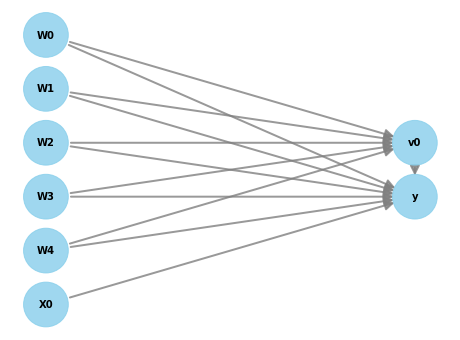

In [8]:
model.view_model()

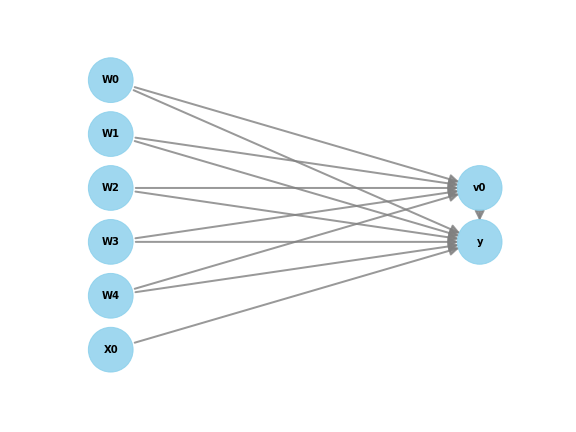

In [10]:
display(Image(filename="causal_model.png"))